In [62]:
using Flux
using Flux: onehotbatch, argmax, mse, throttle, accuracy, crossentropy
using Base.Iterators: partition
using Images
using MNIST

In [63]:
X, labels = traindata();
X ./= 255;

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Float64}, ::Int64, ::Int64) at ./deprecated.jl:57
 [3] traindata() at /Users/alanedelman/.julia/v0.6/MNIST/src/MNIST.jl:88
 [4] include_string(::String, ::String) at ./loading.jl:515
 [5] include_string(::Module, ::String, ::String) at /Users/alanedelman/.julia/v0.6/Compat/src/Compat.jl:174
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/alanedelman/.julia/v0.6/IJulia/src/execute_request.jl:154
 [7] eventloop(::ZMQ.Socket) at /Users/alanedelman/.julia/v0.6/IJulia/src/eventloop.jl:8
 [8] (::IJulia.##14#17)() at ./task.jl:335
while loading In[63], in expression starting on line 1
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Float64}, ::Int64) at ./deprecated.jl:57
 [3] traindata() at /Users/alanedelman/.julia/v0.6/MNIST/src/MNIST.jl:89
 [4] include_string(::String, ::String) at ./loading.jl:515
 [5] include_string(::Module, ::String, ::String) at /Users/

In [64]:
size(X)

(784, 60000)

In [65]:
img(x::Vector) = Gray.(reshape(clamp.(x, 0, 1), 28, 28))

img (generic function with 1 method)

,,,,

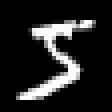
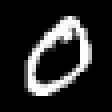
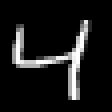
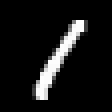
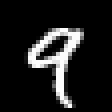

In [66]:
[img(X[:,i]) for i=1:5]

In [67]:
labels[1:5]

5-element Array{Float64,1}:
 5.0
 0.0
 4.0
 1.0
 9.0

In [68]:
Y = onehotbatch(labels, 0:9)

10×60000 Flux.OneHotMatrix{Array{Flux.OneHotVector,1}}:
 false   true  false  false  false  …  false  false  false  false  false
 false  false  false   true  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false   true  false  false  false
 false  false   true  false  false     false  false  false  false  false
  true  false  false  false  false  …  false  false   true  false  false
 false  false  false  false  false     false  false  false   true  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false      true  false  false  false   true
 false  false  false  false   true     false  false  false  false  false

In [69]:
Y.data[1]

10-element Flux.OneHotVector:
 false
 false
 false
 false
 false
  true
 false
 false
 false
 false

In [70]:
dump(Y.data[1])

Flux.OneHotVector
  ix: UInt32 6
  of: UInt32 10


In [71]:
m = Chain(
  Dense(28^2, 32, relu),  # relu : make negatives 0
  Dense(32, 10),
  softmax)  # softmax gives vector of probabilities

Chain(Dense(784, 32, NNlib.relu), Dense(32, 10), NNlib.softmax)

In [72]:
m( X[:,1])

Tracked 10-element Array{Float64,1}:
 0.0997064
 0.0998076
 0.100706 
 0.0992866
 0.0997339
 0.100126 
 0.0992701
 0.100686 
 0.0989188
 0.101758 

In [73]:
size.(params(m[1]))

2-element Array{Tuple{Int64,Vararg{Int64,N} where N},1}:
 (32, 784)
 (32,)    

In [74]:
W1,b1 = params(m[1]);
W2,b2 = params(m[2])

2-element Array{Any,1}:
 param([-0.0102272 0.00166603 … 0.0167428 -0.00546035; -0.0168158 -0.00490895 … -0.000875163 -0.00135421; … ; 0.00568172 -0.0123717 … -0.000297572 0.00067164; 0.00531303 -0.00272715 … -0.00558957 -0.00633661])
 param([-0.00612419, -0.00209693, 0.000654998, -0.0140095, -0.0105674, 0.00259562, -0.00802091, 0.00555895, -0.0125143, 0.0134621])                                                                              

In [75]:
softmax(W2*(max.(0,W1*X[:,1] +b1))+ b2)

Tracked 10-element Array{Float64,1}:
 0.0997064
 0.0998076
 0.100706 
 0.0992866
 0.0997339
 0.100126 
 0.0992701
 0.100686 
 0.0989188
 0.101758 

In [77]:
loss(x, y) = crossentropy(m(x), y)
acc(x, y) = mean(argmax(m(x)) .== argmax(y))

dataset = repeated((X, Y), 200)
evalcb = () -> @show(loss(X, Y))
opt = ADAM(params(m))

Flux.train!(loss, dataset, opt, cb = throttle(evalcb, 10))



LoadError: [91mUndefVarError: iterators not defined[39m

In [79]:
acc(X, Y)


0.9079166666666667

In [80]:
?crossentropy

search:



No documentation found.

`Flux.crossentropy` is a `Function`.

```
# 1 method for generic function "crossentropy":
crossentropy(ŷ::Union{AbstractArray{T,1}, AbstractArray{T,2}} where T, y::Union{AbstractArray{T,1}, AbstractArray{T,2}} where T) in Flux at /Users/alanedelman/.julia/v0.6/Flux/src/layers/stateless.jl:5
```
